In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip -uq "/content/drive/My Drive/DatasetImage.zip" -d "/content/drive/My Drive"

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
labels = ['Pothole', 'Breaker', 'Pedestrian', 'Vehicle']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
#Now we can easily fetch our train and validation data.
train = get_data('../content/drive/My Drive/DatasetImage/Train')
val = get_data('../content/drive/My Drive/DatasetImage/Val')

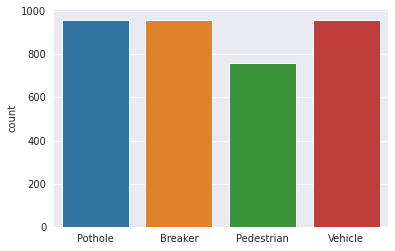

In [4]:
l = []
for i in train:
    if (i[1] == 0):
        l.append("Pothole")
    elif (i[1]==1):
        l.append("Breaker")
    elif (i[1]==2):  
        l.append("Pedestrian")
    else :
        l.append("Vehicle")
    
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Pothole')

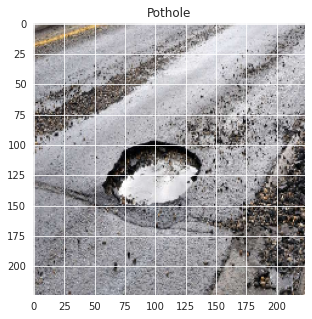

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[50][0])
plt.title(labels[train[50][1]])

Text(0.5, 1.0, 'Pedestrian')

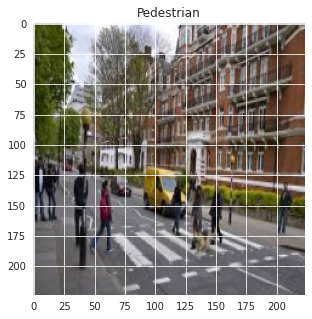

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1250][0])
plt.title(labels[train[-1250][1]])

Text(0.5, 1.0, 'Vehicle')

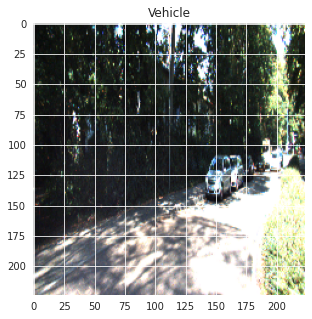

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[-800][0])
plt.title(labels[train[-800][1]])

Text(0.5, 1.0, 'Breaker')

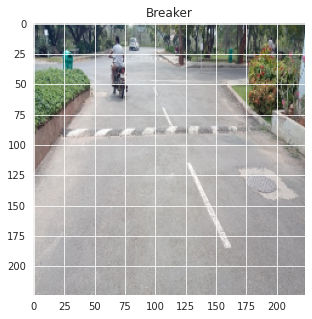

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[1800][0])
plt.title(labels[train[1800][1]])

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [11]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [12]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [13]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500
114/114 [==============================] - 49s 54ms/step - loss: 1.3760 - accuracy: 0.2917 - val_loss: 1.3511 - val_accuracy: 0.4121
Epoch 2/500
114/114 [==============================] - 5s 41ms/step - loss: 1.3487 - accuracy: 0.3760 - val_loss: 1.3191 - val_accuracy: 0.4923
Epoch 3/500
114/114 [==============================] - 5s 42ms/step - loss: 1.3117 - accuracy: 0.4513 - val_loss: 1.2791 - val_accuracy: 0.5121
Epoch 4/500
114/114 [==============================] - 5s 40ms/step - loss: 1.2878 - accuracy: 0.4731 - val_loss: 1.2353 - val_accuracy: 0.5330
Epoch 5/500
114/114 [==============================] - 5s 40ms/step - loss: 1.2448 - accuracy: 0.5182 - val_loss: 1.1907 - val_accuracy: 0.5495
Epoch 6/500
114/114 [==============================] - 5s 41ms/step - loss: 1.1942 - accuracy: 0.5588 - val_loss: 1.1445 - val_accuracy: 0.5802
Epoch 7/500
114/114 [==============================] - 5s 41ms/step - loss: 1.1453 - accuracy: 0.5772 - val_loss: 1.1007 - val_accuracy

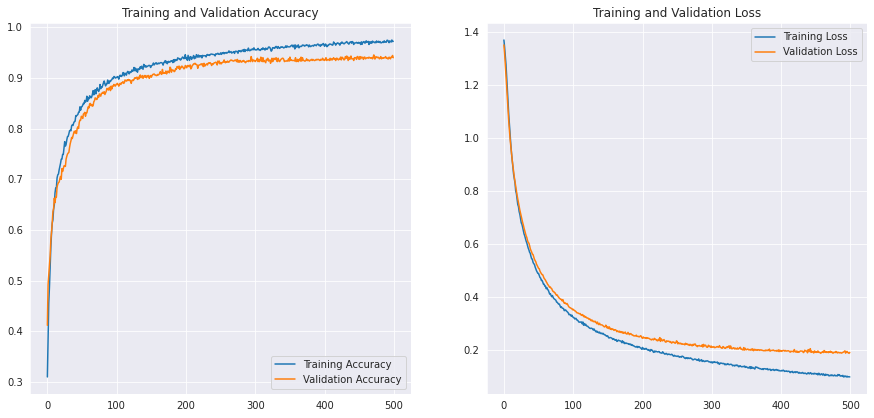

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Pothole (Class 0)','Breaker (Class 1)','Pedestrian (Class 2)','Vehicle (Class 3)']))


                      precision    recall  f1-score   support

   Pothole (Class 0)       0.93      0.96      0.94       240
   Breaker (Class 1)       0.95      0.96      0.95       240
Pedestrian (Class 2)       0.91      0.86      0.88       190
   Vehicle (Class 3)       0.97      0.96      0.96       240

            accuracy                           0.94       910
           macro avg       0.94      0.94      0.94       910
        weighted avg       0.94      0.94      0.94       910

